In [1]:
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

#Scarping URL
url="https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 22.9MB/s]


In [3]:
#BS4 object
html = browser.html
mars_soup = bs(html, 'html.parser')

In [4]:
headers = mars_soup.find_all('th')
info = mars_soup.find_all('tr', class_ = 'data-row')

In [5]:
#Empty lists to hold necessary info
table_headers = []
ids = []
terrestrial_dates = []
sols = []
ls = []
months = []
min_temps = []
pressures = []

#Table headers
for header in headers:
    table_headers.append(header.text)

for information in info:
   #appending id
    mars_id = information.find('td')
    ids.append(int(mars_id.text))
    
    #terrestial dates
    terrestrial_dates.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    #sol
    sols.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    #ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id=mars_id.find_next_sibling('td')
    
    # month
    months.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # min_temp
    min_temps.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # pressure
    pressures.append(float(mars_id.find_next_sibling("td").text))

In [6]:
mars_df =pd.DataFrame(columns = table_headers)
mars_df["id"] = ids 
mars_df["terrestrial_date"] = terrestrial_dates
mars_df["sol"] = sols
mars_df["ls"] = ls
mars_df["month"] = months
mars_df["min_temp"] = min_temps
mars_df["pressure"] = pressures
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# Convert terrestrial_date column from string to datetime
mars_df["terrestrial_date"] = mars_df["terrestrial_date"].astype("datetime64[ns]")
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
#How many months exist on Mars?
(mars_df["month"].unique())

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [9]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# martian_days = mars_df["sol"].unique()
# martian_days
martian_days = ((mars_df["sol"].max())-(mars_df["sol"].min()))
martian_days

1967

### What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

In [20]:
temp_months = []
for month in mars_df["month"]:
    if month not in temp_months:
        temp_months.append(month)

temp_months.sort() #xticks

# agg_mars_df = mars_df.agg(["mean", "median", "var", "std", "sem"])
# min_temp_mean = agg_mars_df=mars_df.agg(["min_temp"])
month_agg = mars_df.groupby("month")
mean_month = month_agg.mean()

In [12]:
mars_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


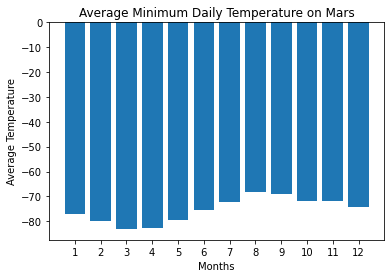

In [24]:
#Plot bar chart
plt.bar(temp_months, mean_month["min_temp"])
plt.xlabel("Months")
plt.ylabel("Average Temperature")
plt.title("Average Minimum Daily Temperature on Mars")
plt.xticks(temp_months)
plt.show()

**The coldest month seems to be Month 3 and the warmest month seems to be month 8**

### Which months have the lowest and the highest atmospheric pressure on Mars?

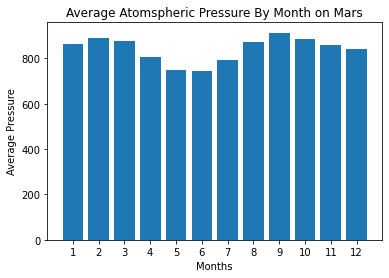

In [28]:
plt.bar(temp_months, mean_month["pressure"])
plt.xlabel("Months")
plt.ylabel("Average Pressure")
plt.title("Average Atomspheric Pressure By Month on Mars")
plt.xticks(temp_months)
plt.show()

**Mars experienced its lowest atmospheric pressure during month 6, and its highest during month 9**

### About how many terrestrial (Earth) days exist in a Martian year? 

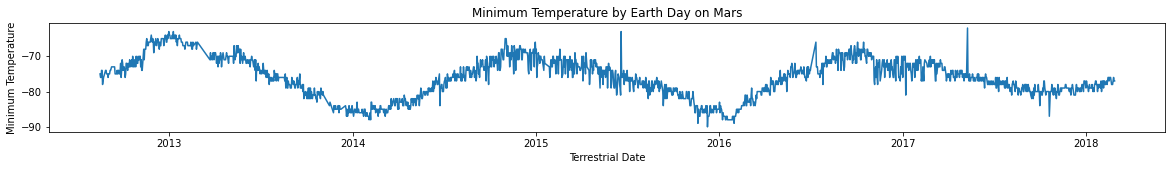

In [37]:
plt.figure(figsize=(20,2))
plt.plot(mars_df["terrestrial_date"], mars_df["min_temp"])
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature by Earth Day on Mars")
plt.show()

In [38]:
mars_df.to_csv("Resources/Mars Dataframe.csv")